CS675          Project-1

Nirmal Rajeshkumar Patel (U02000897)

The goal of this assignment is to understand the logic and methods of exploratory data analysis (EDA).

In [1]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Profiling libraries
from ydata_profiling import ProfileReport

import sweetviz as sv

In [9]:
# Load the dataset
df = pd.read_csv(r"C:\Users\nirma\Documents\Pace University\Intoduction to Data Science\Projects\Project-1\telco-customer-churn.csv")

In [11]:
# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.shape

(7043, 21)

2) List all data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1) Check for missing value, Null, NaN records. Find Outliers. Transform all data to numeric. 

In [19]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

By Seeing the result we can conclude that, there no null values in any columns

In [22]:
pd.isna(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


By seeing results we can conclude that, there are no Nan values

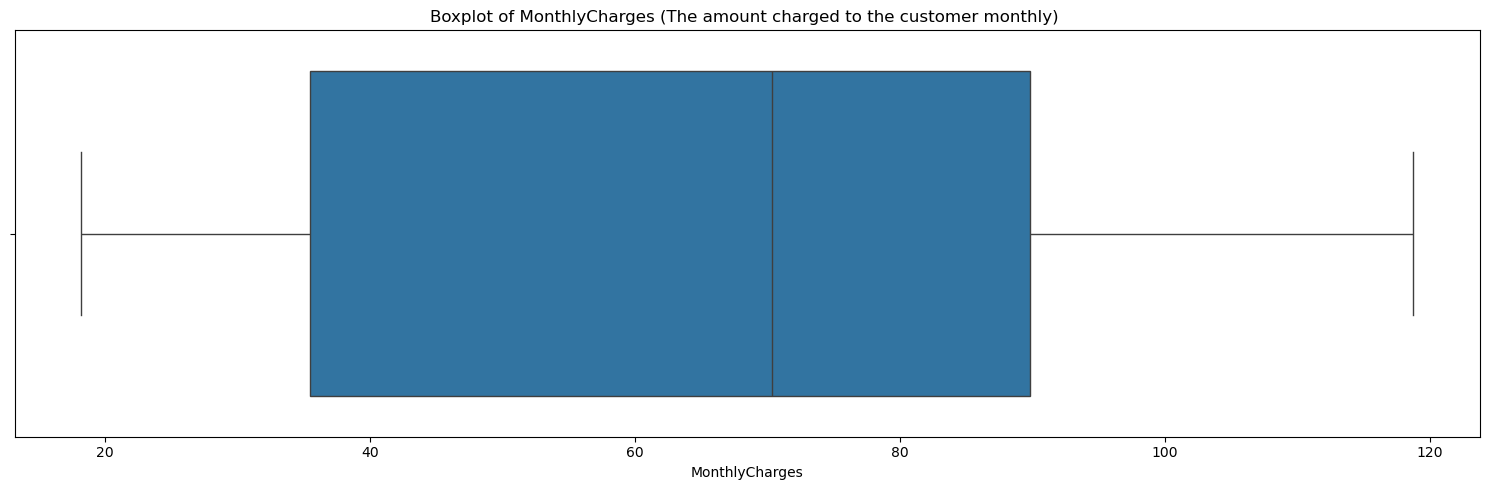

In [25]:
# lets check for outlier

# Creating boxplots to detect outliers
plt.figure(figsize=(15, 5))  # Set the figure size for better readability

sns.boxplot(data=df, x=df['MonthlyCharges'])  # Boxplot for each feature
plt.title(f'Boxplot of MonthlyCharges (The amount charged to the customer monthly) ')  # Adding a title for clarity

plt.tight_layout()  # Adjust subplots to fit the figure area nicely

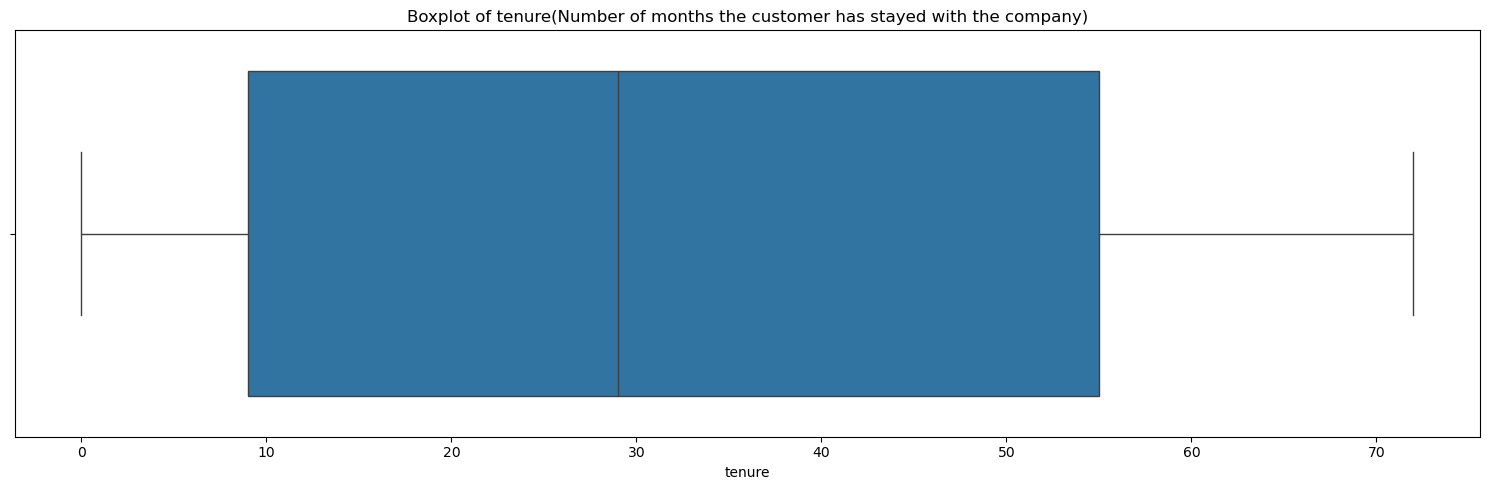

In [27]:
plt.figure(figsize=(15, 5))  # Set the figure size for better readability

sns.boxplot(data=df, x=df['tenure'])  # Boxplot for each feature
plt.title(f'Boxplot of tenure(Number of months the customer has stayed with the company)')  # Adding a title for clarity

plt.tight_layout()  # Adjust subplots to fit the figure area nicely

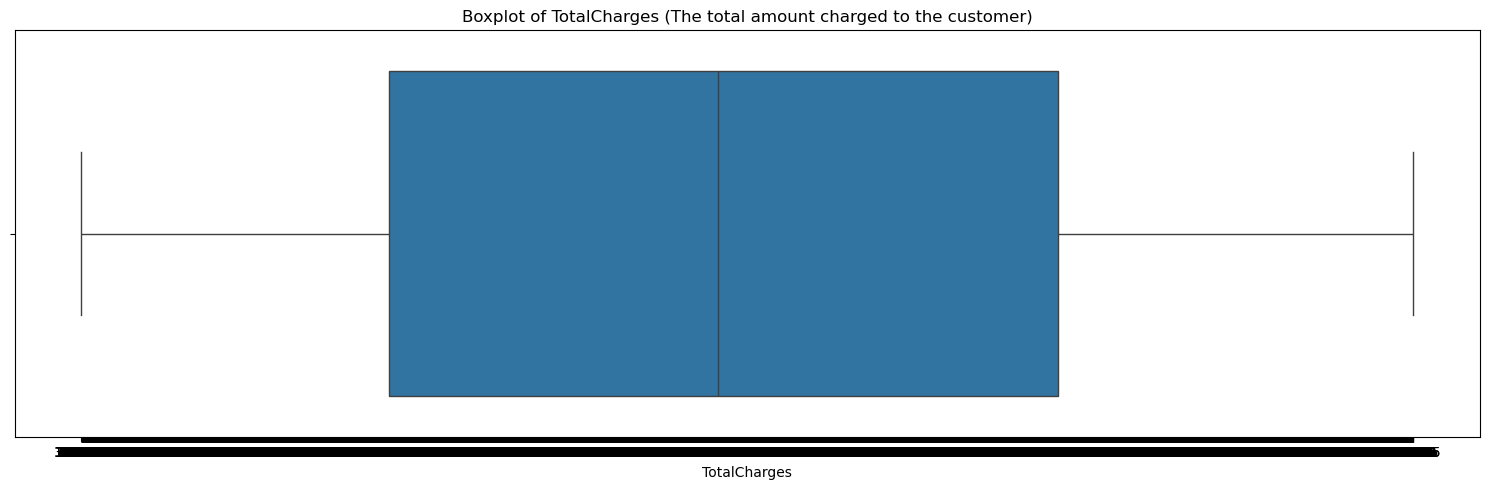

In [29]:
plt.figure(figsize=(15, 5))  # Set the figure size for better readability

sns.boxplot(data=df, x=df['TotalCharges'])  # Boxplot for each feature
plt.title(f'Boxplot of TotalCharges (The total amount charged to the customer)')  # Adding a title for clarity

plt.tight_layout()  # Adjust subplots to fit the figure area nicely

By reviewing all these results we can see that there are no outliers

In [31]:
# List the types of data before transformation
print("Data Types Before Transformation:")
print(df.dtypes)

Data Types Before Transformation:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [32]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')

In [36]:
df_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [38]:
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [40]:
# getting unique values from each column, so we know which values to convert to numerical
for col in df.columns:
    print(col,df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

We will assign each of these text values a number.
We will use 0 and 1 to represent binary data (yes/no, male/female), and assign unique integer values to everything else.

Rename the values such as
    "Yes": 1, "No": 0,
    "Female": 0, "Male": 1,
    "No phone service": 2, "No internet service": 3,
    "DSL": 4, "Fiber optic": 5,
    "Month-to-month": 6, "One year": 7, "Two year": 8,
    "Electronic check": 9, "Mailed check": 10,
    "Bank transfer (automatic)": 11, "Credit card (automatic)": 12,
    " ": -1  # for missing values


In [44]:
for col in df.columns:
    df.loc[df[col] == "No", col] = 0
    df.loc[df[col] == "Yes", col] = 1
    df.loc[df[col] == "Female", col] = 0
    df.loc[df[col] == "Male", col] = 1
    df.loc[df[col] == "No phone service", col] = 2
    df.loc[df[col] == "No internet service", col] = 3
    df.loc[df[col] == "DSL", col] = 4
    df.loc[df[col] == "Fiber optic", col] = 5
    df.loc[df[col] == "Month-to-month", col] = 6
    df.loc[df[col] == "One year", col] = 7
    df.loc[df[col] == "Two year", col] = 8
    df.loc[df[col] == "Electronic check", col] = 9
    df.loc[df[col] == "Mailed check", col] = 10
    df.loc[df[col] == "Bank transfer (automatic)", col] = 11
    df.loc[df[col] == "Credit card (automatic)", col] = 12
    df.loc[df[col] == " ", col] = -1

In [46]:
# checking the unique values of our dataframe
for col in df.columns:
    print(col,df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [2 0 1]
InternetService [4 5 0]
OnlineSecurity [0 1 3]
OnlineBackup [1 0 3]
DeviceProtection [0 1 3]
TechSupport [0 1 3]
StreamingTV [0 1 3]
StreamingMovies [0 1 3]
Contract [6 7 8]
PaperlessBilling [1 0]
PaymentMethod [9 10 11 12]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn [0 1]


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Upon reviewing the result we can see that, even after changing values data types have not changed yet, so we will change it now.

In [51]:
cols_to_convert_to_int = df.columns[np.where(df.dtypes=="object")]
cols_to_convert_to_int = cols_to_convert_to_int[1:] # we are not conserding the customerID col because it has all the unique values 

# converting columns to integer type
for col in cols_to_convert_to_int:
    df[col] = pd.to_numeric(df[col])

In [53]:
print("Altered datatypes:\n")
df.dtypes

Altered datatypes:



customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Here, we can see the updated datatypes.

In [56]:
# getting correlation matrix of matrix
df = df.drop(columns=['customerID']) #Droping this column because it contains string values and its not that important
corr = df.corr()
corr.style.background_gradient('coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.000485,-0.008049,-0.000214,0.000788,0.005642,0.002805,0.002992,0.002082,0.000126,-0.011754,-0.005209,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.221726,-0.208709,-0.170002,-0.172926,-0.217566,-0.155266,-0.149000,-0.142554,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000447,0.056157,0.059540,0.064584,0.047420,0.054605,0.051632,0.294806,-0.014877,0.133115,0.096848,0.317503,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.162042,0.179614,0.161106,0.157003,0.173036,0.146505,0.136652,0.243187,-0.111377,0.123844,-0.113890,0.062077,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.038429,0.085500,0.107643,0.107656,0.084902,0.078087,0.081169,0.671607,0.006152,0.340305,0.247900,0.826179,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,-0.072469,0.146522,0.164540,0.156631,0.145215,0.179510,0.175257,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,-0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.271593,-0.271502,-0.256501,-0.249718,-0.269655,-0.252334,-0.247970,0.078613,0.108230,0.030659,0.146153,0.250628,0.019423
InternetService,-0.008049,0.221726,-0.000447,-0.162042,0.038429,-0.072469,0.271593,1.000000,-0.924873,-0.900154,-0.899107,-0.923553,-0.880101,-0.880663,-0.272358,0.358198,-0.146894,0.854477,0.413442,0.273831
OnlineSecurity,-0.000214,-0.208709,0.056157,0.179614,0.085500,0.146522,-0.271502,-0.924873,1.000000,0.884432,0.883200,0.902492,0.861988,0.863460,0.352177,-0.341703,0.187499,-0.694378,-0.238097,-0.307989
OnlineBackup,0.000788,-0.170002,0.059540,0.161106,0.107643,0.164540,-0.256501,-0.900154,0.884432,1.000000,0.879558,0.885567,0.870863,0.869091,0.326757,-0.294559,0.166860,-0.642246,-0.194062,-0.280770


<Axes: >

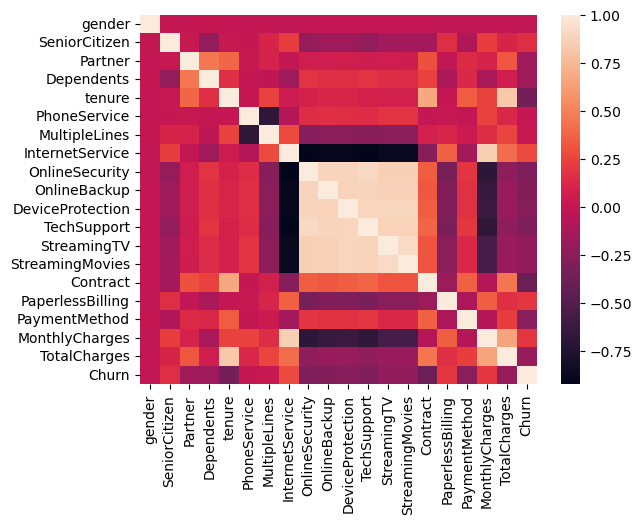

In [58]:
sns.heatmap(corr)

3) Perform EDA. Present dependencies and correlations among the various features in the data. 

In [61]:
# generating a SweetViz report for the dataframe
analysis_eda = sv.analyze(df)
analysis_eda.show_html('Analysis_eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analysis_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Churn', ylabel='gender'>

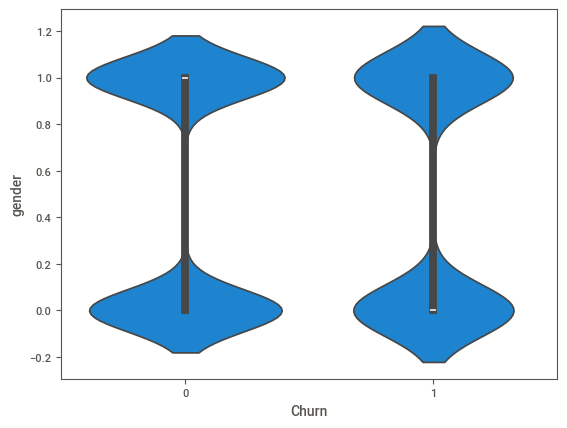

In [62]:
import seaborn as sns
sns.violinplot(x='Churn', y='gender', data=df)

Here we can see that churn ratio for "Male"=1 who churn/ do not churn and churn ration for "Female"=0 who churn/ do not churn is equal.  

<Axes: xlabel='Churn', ylabel='SeniorCitizen'>

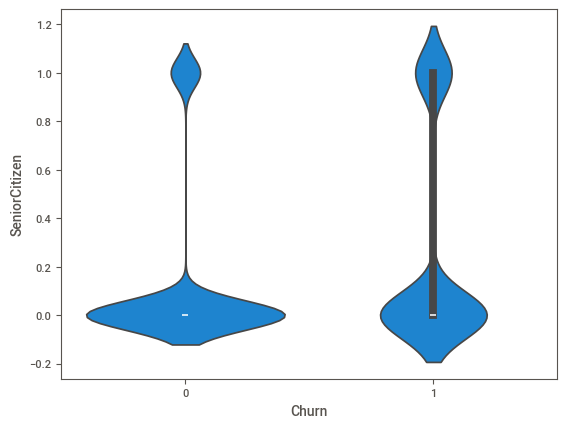

In [66]:
sns.violinplot(x='Churn',y='SeniorCitizen', data=df)

Here we can see that there is a wide spread for non-SeniorCitizen who do not churn.

<Axes: xlabel='Churn', ylabel='Partner'>

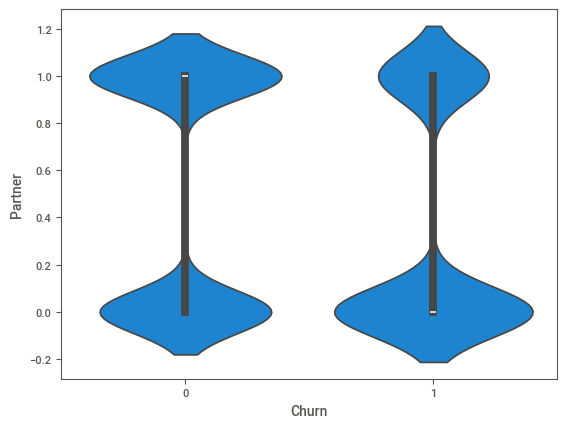

In [69]:
sns.violinplot(x='Churn',y='Partner', data=df)

Customers with partner churn less than customers with no partner churn. 

<Axes: xlabel='Churn', ylabel='Dependents'>

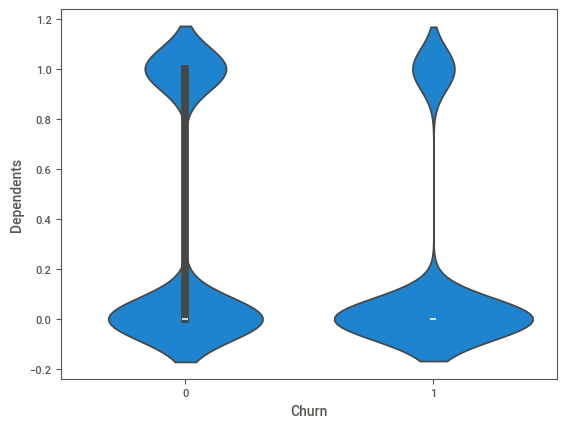

In [72]:
sns.violinplot(x='Churn',y='Dependents', data=df)

Customer with Dependent churn less than customer with no dependents.

<Axes: xlabel='Churn', ylabel='tenure'>

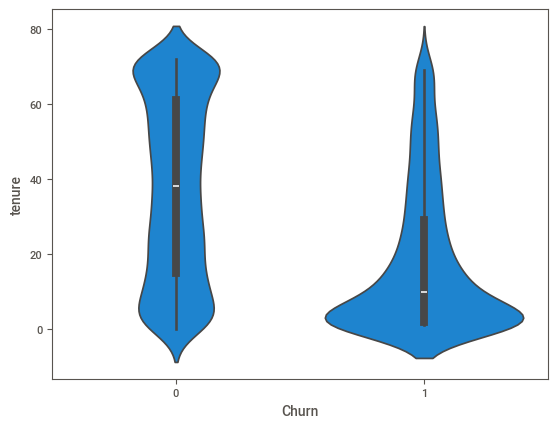

In [75]:
sns.violinplot(x='Churn',y='tenure', data=df)

Customers with short tenure churn more.

<Axes: xlabel='Churn', ylabel='PhoneService'>

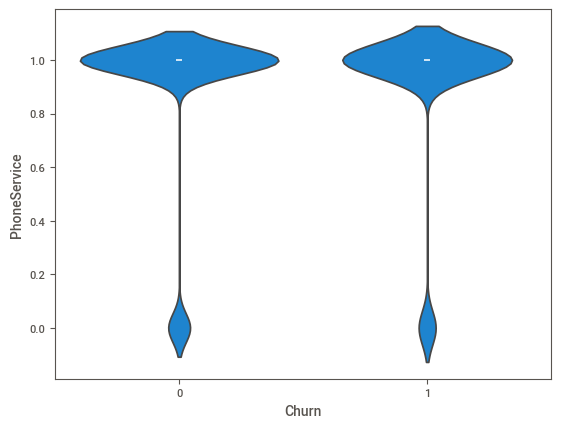

In [78]:
sns.violinplot(x='Churn',y='PhoneService', data=df)

Slighty higher propertion of customers with PhoneService do not churn then customers with PhoneService.

<Axes: xlabel='Churn', ylabel='MultipleLines'>

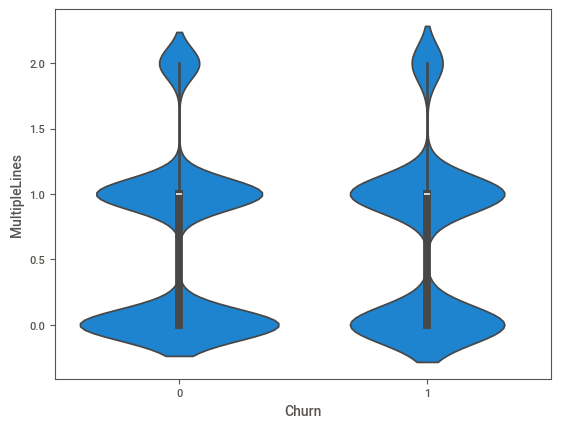

In [81]:
sns.violinplot(x='Churn',y='MultipleLines', data=df)

Values for MultipleLines are 0="No", 1="Yes", 2="No Phone service". There is little more of a customers who do not churn for all the 3 options compared to customers who churn for all options.

<Axes: xlabel='Churn', ylabel='InternetService'>

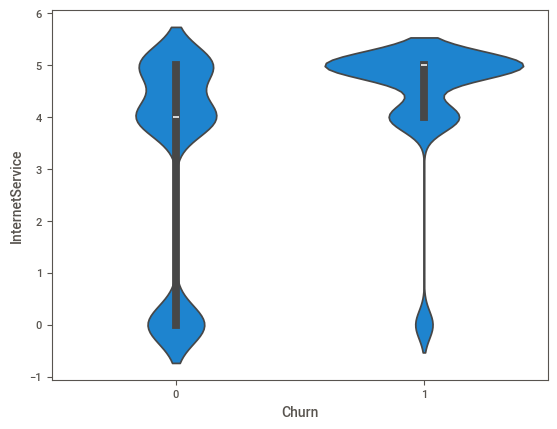

In [84]:
sns.violinplot(x='Churn',y='InternetService', data=df)

Values of Internet Service are 0="No", 4="Dsl", 5="Fiber optic". Here we can see that a wide distribution of customers with fiber optic tend to churn the most among all 3 values.

<Axes: xlabel='Churn', ylabel='OnlineSecurity'>

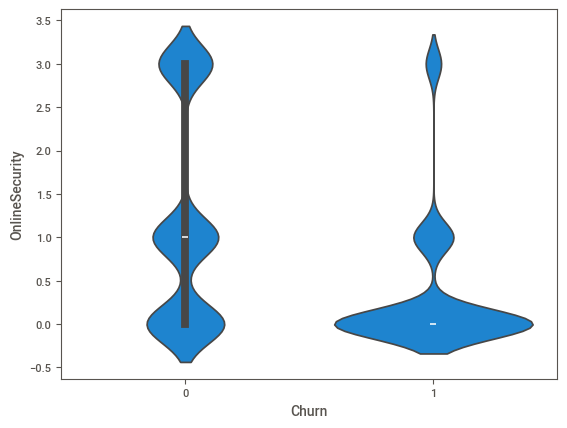

In [87]:
sns.violinplot(x='Churn',y='OnlineSecurity', data=df)

Values for OnlineSecurity are 0="No", 1="Yes", 3="No Internet service". Customers with no online security churn more than other 2.

<Axes: xlabel='Churn', ylabel='OnlineBackup'>

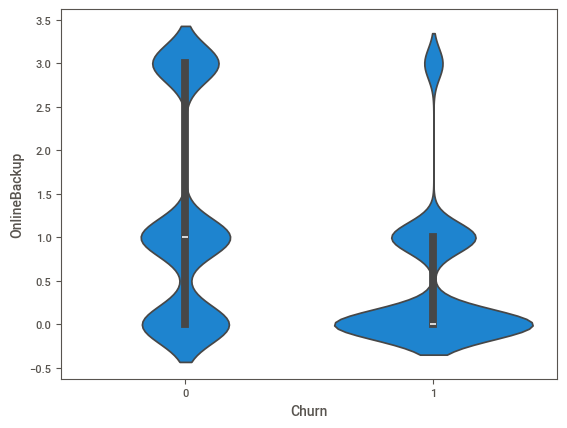

In [90]:
sns.violinplot(x='Churn',y='OnlineBackup', data=df)

Values for OnlineBackup are 0="No", 1="Yes", 3="No Internet service". Customer with no online backup churn more than other 2.

<Axes: xlabel='Churn', ylabel='DeviceProtection'>

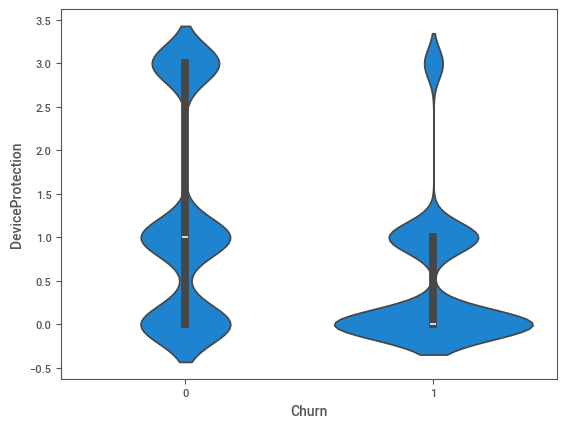

In [93]:
sns.violinplot(x='Churn',y='DeviceProtection', data=df)

Values for DeviceProtection are 0="No", 1="Yes", 3="No Internet service". Customer with no Device Protection churn more than other 2.

<Axes: xlabel='Churn', ylabel='TechSupport'>

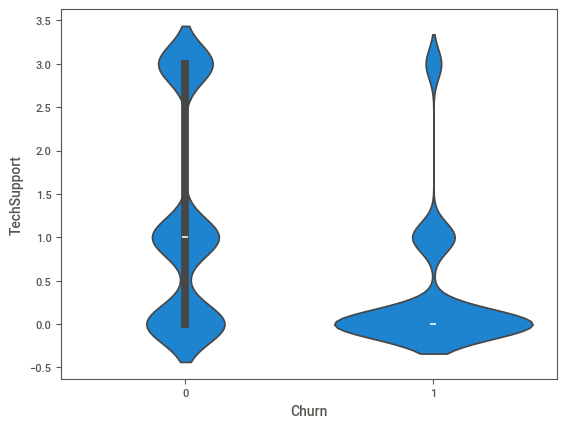

In [96]:
sns.violinplot(x='Churn',y='TechSupport', data=df)

Values for TechSupport are 0="No", 1="Yes", 3="No Internet service". Customer with no Tech Support churn more than other 2.

<Axes: xlabel='Churn', ylabel='StreamingTV'>

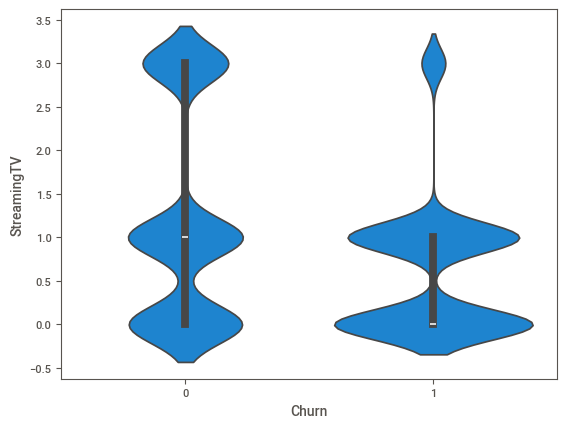

In [99]:
sns.violinplot(x='Churn',y='StreamingTV', data=df)

Values for StreamingTV are 0="No", 1="Yes", 3="No Internet service". Customers with no StreamingTv and StreamingTv churn more.

<Axes: xlabel='Churn', ylabel='StreamingMovies'>

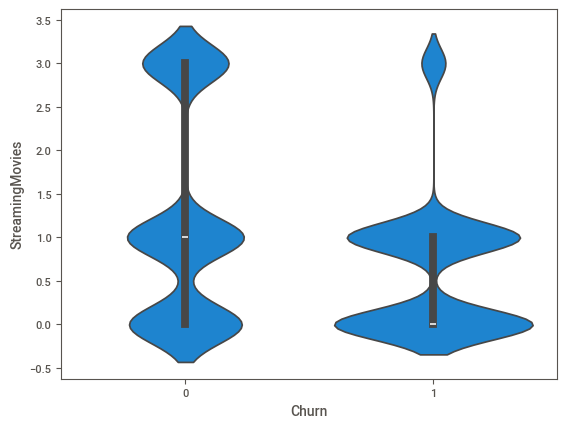

In [102]:
sns.violinplot(x='Churn',y='StreamingMovies', data=df)

Values for StreamingMovies are 0="No", 1="Yes", 3="No Internet service". Customers with no StreamingMovies and StreamingMovies churn more.

<Axes: xlabel='Churn', ylabel='Contract'>

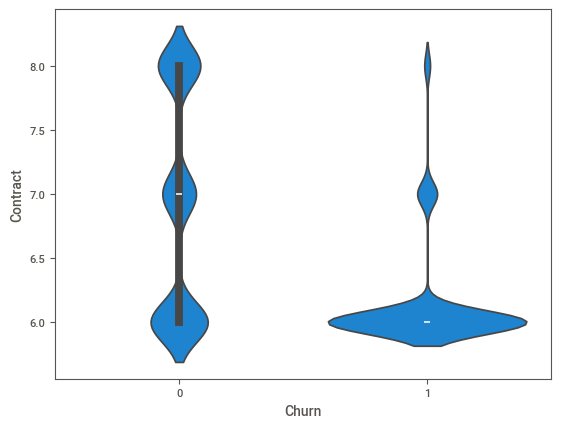

In [105]:
sns.violinplot(x='Churn',y='Contract', data=df)

Values for Contract 6="Month-to-month", 7="one year", and 8="two years". Customers with month-to-month contracts tend to churn the most.

<Axes: xlabel='Churn', ylabel='PaperlessBilling'>

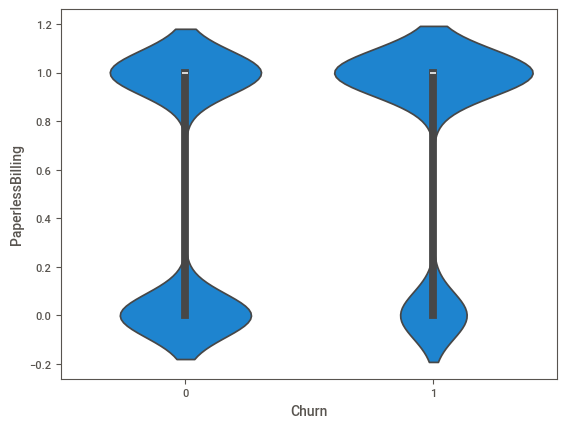

In [108]:
sns.violinplot(x='Churn',y='PaperlessBilling', data=df)

There is a wide distribution for customer with paperlessBilling and they will churn.

<Axes: xlabel='Churn', ylabel='PaymentMethod'>

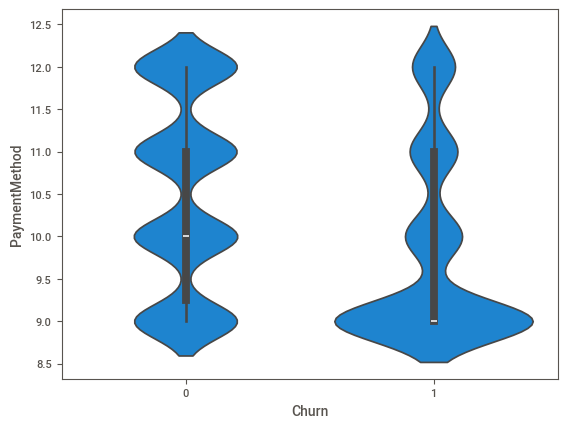

In [111]:
sns.violinplot(x='Churn',y='PaymentMethod', data=df)

Values for PaymentMethod, 9="electronic check", 10="mailed check", 11="automatic bank transfer" and 12="automatic credit card". An even proportion of customers across all 4 payment types do not churn, but a higher proportion of customers who pay by electronic check tend to churn more than the other 3 payment types.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

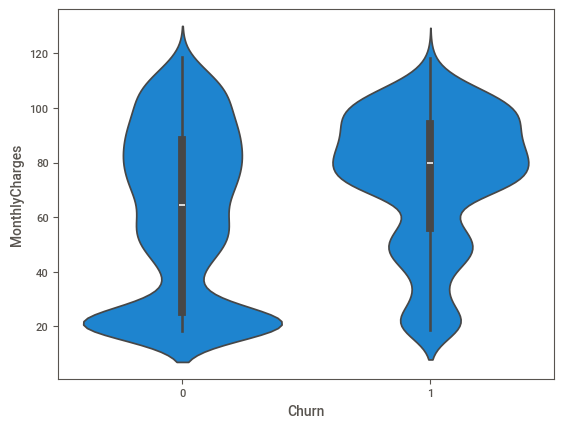

In [114]:
sns.violinplot(x='Churn',y='MonthlyCharges', data=df)

Here we can see that customers with lower charges each month churn less than customers with higher charges each month.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

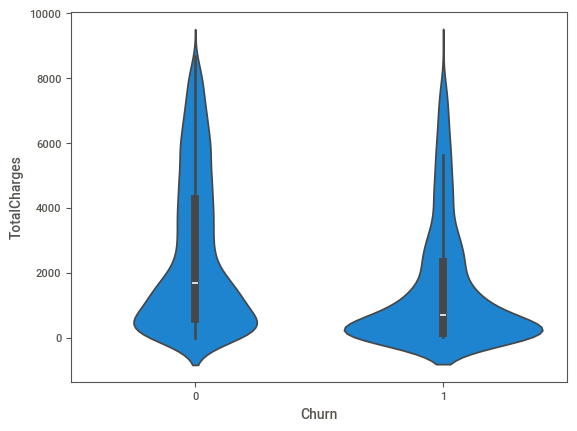

In [117]:
sns.violinplot(x='Churn',y='TotalCharges', data=df)

Customers with low total charges churn more than the customers with high total charges.

4) Split the dataset into training and test datasets (80/20 ratio).

In [121]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

In [123]:
train_df.shape

(5634, 20)

In [125]:
test_df.shape

(1409, 20)

In [127]:
# Compare training and test datasets on the target 'Churn'
report = sv.compare([train_df, "Training Set"], [test_df, "Test Set"], target_feat='Churn')

# Generate the report
report.show_html('train_test_comparison_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report train_test_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


5) State limitations/issues (if any) with the given dataset.

State Limitations/Issues with the Dataset:-

Imbalanced Target Feature: The 'Churn' feature might be imbalanced, which can affect the performance of classification models.

Outliers: Numerical features such as 'MonthlyCharges' and 'TotalCharges' may contain outliers that can skew analysis results.

 
While performing the datatype conversion, if we go ahead with "to_numeric" function on object type it will be converted to NaN 
as had text data in it. So we got 2 option, either use the labelEncoding or to manually fetch the unique values and assign them
unique numerical value to differentiate it and then convert it into numeric datatype using "to_numeric" function. The only 
problem with latter method is that it needs attention and manual work.

Project - 2 Building Machine Learning Model

In [150]:
# 1. Isolate X variables
X = df.drop(columns= ['Churn'])

# 2. Isolate y variable
y = df['Churn']

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, stratify = y , random_state=42)

Now we will build the model

In [142]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.6/124.9 MB 12.0 MB/s eta 0:00:11
    --------------------------------------- 2.6/124.9 MB 27.7 MB/s eta 0:00:05
   - -------------------------------------- 4.6/124.9 MB 29.2 MB/s eta 0:00:05
   -- ------------------------------------- 6.4/124.9 MB 34.0 MB/s eta 0:00:04
   -- ------------------------------------- 8.2/124.9 MB 35.1 MB/s eta 0:00:04
   --- ------------------------------------ 9.9/124.9 MB 35.2 MB/s eta 0:00:04
   --- ------------------------------------ 11.6/124.9 MB 40.9 MB/s eta 0:00:03
   ---- ----------------------------------- 13.5/124.9 MB 40.9 MB/s eta 0:00:03
   ---- ----------------------------------- 15.4/124.9 MB 38.5 MB/s eta 0:00:03
   ----- ---------------------------------- 17.3/124.9 MB 40.9 MB/s eta 0:00:03
   ------ --------------------------------- 19.0/124.9 MB

In [198]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Function to train, predict, and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Evaluate each model and print results
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Results for {model_name}:")
    for metric, score in results[model_name].items():
        print(f"  {metric}: {score:.4f}")
    print("\n")

Results for Naive Bayes:
  Accuracy: 0.6657
  Recall: 0.8583
  Precision: 0.4344
  F1 Score: 0.5768


Results for Logistic Regression:
  Accuracy: 0.7999
  Recall: 0.5428
  Precision: 0.6465
  F1 Score: 0.5901


Results for Random Forest:
  Accuracy: 0.7942
  Recall: 0.5241
  Precision: 0.6364
  F1 Score: 0.5748


Results for XGBoost:
  Accuracy: 0.7835
  Recall: 0.5241
  Precision: 0.6068
  F1 Score: 0.5624




C:\Users\nirma\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Now it time for Model Tunning

Method - 1 :- GridSearch CV

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()

# Define parameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8013818733146204


Method - 2 RandomizedSearch CV

In [162]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier()

# Define random search grid with distributions for sampling
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Get best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'n_estimators': 450, 'min_samples_split': 10, 'max_depth': None}
Best Score: 0.8001391644772822


Now Applying SMOTE Technique and again feed the data to our models and tune the new models

In [182]:
pip install SMOTE

Note: you may need to restart the kernel to use updated packages.


In [196]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance of classes after applying SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_smote.value_counts())

Class distribution before SMOTE: Churn
0    4139
1    1495
Name: count, dtype: int64
Class distribution after SMOTE: Churn
0    4139
1    4139
Name: count, dtype: int64


Building New Model and giving input After SMOTE Technique

In [190]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Function to train, predict, and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Evaluate each model and print results
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    print(f"Results for {model_name}:")
    for metric, score in results[model_name].items():
        print(f"  {metric}: {score:.4f}")
    print("\n")

Results for Naive Bayes:
  Accuracy: 0.6515
  Recall: 0.8636
  Precision: 0.4233
  F1 Score: 0.5682


Results for Logistic Regression:
  Accuracy: 0.7339
  Recall: 0.7914
  Precision: 0.4992
  F1 Score: 0.6122


Results for Random Forest:
  Accuracy: 0.7835
  Recall: 0.5936
  Precision: 0.5920
  F1 Score: 0.5928


Results for XGBoost:
  Accuracy: 0.7757
  Recall: 0.5775
  Precision: 0.5775
  F1 Score: 0.5775




C:\Users\nirma\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:32:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Now we will tune this new models using GridSearch CV

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()

# Define parameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Get best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8508208181911059


Now we will tune this new models using RandomizedSearch CV

In [202]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier()

# Define random search grid with distributions for sampling
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy')
random_search.fit(X_train_smote, y_train_smote)

# Get best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': None}
Best Score: 0.8523907205511041
